In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

### Data extraction

In [2]:
url='https://www.ukrstat.gov.ua/operativ/operativ2019/ds/pp/pp_u/arh_pp2019_u.html'
def get_page(url):  #be careful, we don't want to crash the site
    HEADERS = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
            "Accept-Language": "en-US,en;q=0.5",
            "Accept-Encoding": "gzip, deflate",
            "Connection": "keep-alive",
            "Upgrade-Insecure-Requests": "1",
            "Sec-Fetch-Dest": "document",
            "Sec-Fetch-Mode": "navigate",
            "Sec-Fetch-Site": "none",
            "Sec-Fetch-User": "?1",
            "Cache-Control": "max-age=0",
        }
    html = requests.get(url, headers=HEADERS)
    bs = BeautifulSoup(html.text, 'html.parser')
    return  bs


In [3]:
bs=get_page(url)

In [4]:
#Extract page names for years

#links=bs2.find('div', attrs={'align': 'right'}).find('table', attrs={'class':'MsoNormalTable'})
links_year=bs.find('table').find_all(href=re.compile(r'\d/ds'))
list_links_year=['https://www.ukrstat.gov.ua/operativ'+link['href'][11:] for link in links_year]
list_links_year.append(url)
list_links_year

['https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/arh_pp2018_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2017/ds/pp/pp_u/arh_pp2017_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2016/ds/pp/pp_u/arh_pp2016_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2015/ds/pp/pp_u/arh_pp2015_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2014/ds/pp/pp_u/arh_pp2014.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2013/ds/pp/pp_u/arh_pp2013.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2012/ds/pp/pp_u/arh_pp2012.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2011/ds/pp/pp_u/arh_pp2011.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2010/ds/pp/pp_u/arh_pp2010.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/arh_pp2009.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2008/ds/pp/pp_u/arh_pp2008.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2007/ds/pp/pp_u/arh_pp2007.html',
 'https://www.ukrstat.gov.ua/ope

In [5]:
'''
Extract page names for months
'''

list_year_month=[]

for links in list_links_year:
    bs2=get_page(links)
    links_month=bs2.find_all('a', href=re.compile('operativ\d{4}/ds/pp/pp_u/pp|^pp'))
    list_links_month=[ link['href'] for link in links_month]
    list_links_month=[re.sub('(\.\./)+operativ\d{4}/ds/pp/pp_u/','', link)\
                        for link in list_links_month]
    list_links_month=[links[:60]+link for link in list_links_month]
    list_links_month
    list_year_month.append(list_links_month)
        
import itertools
list_year_month = list(itertools.chain(*list_year_month))
list_year_month

['https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp1218_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp1118_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp1018_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0918_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0818_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0718_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0618_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0518_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0418_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0318_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0218_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0118_u.html',
 'https://www.ukrstat.gov.ua/operativ/operativ2017/ds/pp/pp_u/pp

In [6]:
'''
Extract data for each page names
'''

df0=pd.DataFrame()
for link in list_year_month:
    try:
        df = pd.read_html(link, header=0)[1] #read table
        df=df[df['Unnamed: 0']=='Україна'] #read only data across the country
        df['link']=link
        print(link)
        df0=pd.concat([df, df0]) 
    except:
        print('Error: ', link)
df0

https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp1218_u.html
https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp1118_u.html
https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp1018_u.html
https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0918_u.html
https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0818_u.html
https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0718_u.html
https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0618_u.html
https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0518_u.html
https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0418_u.html
https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0318_u.html
https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0218_u.html
https://www.ukrstat.gov.ua/operativ/operativ2018/ds/pp/pp_u/pp0118_u.html
https://www.ukrstat.gov.ua/operativ/operativ2017/ds/pp/pp_u/pp1217_u.html
https://www.ukrstat.gov.ua/operativ/op

https://www.ukrstat.gov.ua/operativ/operativ2010/ds/pp/pp_u/pp0110_u.html
https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/pp1209_u.html
https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/pp1109_u.html
https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/pp1009_u.html
https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/pp0909_u.html
https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/pp0809_u.html
https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/pp0709_u.html
https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/pp0609_u.html
https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/pp0509_u.html
https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/pp0409_u.html
https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/pp0309_u.html
https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/pp0209_u.html
https://www.ukrstat.gov.ua/operativ/operativ2009/ds/pp/pp_u/pp0109_u.html
https://www.ukrstat.gov.ua/operativ/op

,Unnamed: 0,Кількість живонароджень,Кількість смертей,"Природний приріст, скорочення (–)",Кількість смертей дітей у віці до 1 року,link,Кількість смертей дітей у віці до 1 року,Народжені,Померлі,Природний приріст,...,"Кількість померлих у віці до 1 року, осіб",Кількість народжених,Природний приріст (скорочення),Кількість померлих дітей у віці до 1 року,Кількість померлих дітей у віці до 1 року,Природний приріст скорочення (–),Кількість живонароджених,"Природний приріст, скорочення (–)",Кількість випадків смерті дітей у віці до 1 року,Кількість випадків смерті дітей у віці до 1 року
0,Україна,27801.0,62196.0,-34395,167.0,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Україна,51496.0,110087.0,-58591,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,330.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Україна,76125.0,159264.0,-83139,514.0,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Україна,99105.0,207143.0,-108038,687.0,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Україна,126723.0,260934.0,-134211,887.0,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Україна,NaN,NaN,-163067.0,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1645.0,NaN,NaN,226545.0,NaN,NaN,NaN
0,Україна,255094.0,431482.0,-176388.0,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1824.0,NaN
0,Україна,286064.0,484481.0,-198417.0,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
0,Україна,312603.0,535104.0,-222501.0,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2207.0


In [7]:
'''
Fix problem with December 2011
'''

link_error='https://www.ukrstat.gov.ua/operativ/operativ2012/ds/pp/pp_u/pp0112_u.html'
df_link_error = pd.read_html(link_error, header=0)[1]
df_link_error=df_link_error[df_link_error['Unnamed: 0']=='Україна']
df_link_error['link']=link_error
print(link_error)
df_link_error['year']='2011'
df_link_error['month']='1211'
df_link_error


https://www.ukrstat.gov.ua/operativ/operativ2012/ds/pp/pp_u/pp0112_u.html


,Unnamed: 0,"Народжені, осіб","Померлі, осіб","Природний приріст, осіб","Кількість померлих у віці до 1 року, осіб",link,year,month
0,Україна,502595.0,664588.0,-161993.0,4511.0,https://www.ukrstat.gov.ua/operativ/operativ20...,2011,1211


In [8]:
'''
Get year and month from link
'''

df0['year']=df0['link'].str.extract(r'operativ(\d+)', expand=False).str.strip()
df0['month']=df0['link'].str.extract(r'pp_u/pp(.*)_u\.htm', expand=False).str.strip()
df0
df0=pd.concat([df0, df_link_error])

df0

,Unnamed: 0,Кількість живонароджень,Кількість смертей,"Природний приріст, скорочення (–)",Кількість смертей дітей у віці до 1 року,link,Кількість смертей дітей у віці до 1 року,Народжені,Померлі,Природний приріст,...,Природний приріст (скорочення),Кількість померлих дітей у віці до 1 року,Кількість померлих дітей у віці до 1 року,Природний приріст скорочення (–),Кількість живонароджених,"Природний приріст, скорочення (–)",Кількість випадків смерті дітей у віці до 1 року,Кількість випадків смерті дітей у віці до 1 року,year,month
0,Україна,27801.0,62196.0,-34395,167.0,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,0119
0,Україна,51496.0,110087.0,-58591,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,330.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,0219
0,Україна,76125.0,159264.0,-83139,514.0,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,0319
0,Україна,99105.0,207143.0,-108038,687.0,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,0419
0,Україна,126723.0,260934.0,-134211,887.0,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,0519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Україна,255094.0,431482.0,-176388.0,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1824.0,NaN,2018,0918
0,Україна,286064.0,484481.0,-198417.0,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,2018,1018
0,Україна,312603.0,535104.0,-222501.0,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2207.0,2018,1118
0,Україна,335874.0,587665.0,-251791.0,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2397.0,NaN,2018,1218


In [9]:
df0=df0.sort_values(by=['year','month'], ascending=False).reset_index(drop=True)
df0

,Unnamed: 0,Кількість живонароджень,Кількість смертей,"Природний приріст, скорочення (–)",Кількість смертей дітей у віці до 1 року,link,Кількість смертей дітей у віці до 1 року,Народжені,Померлі,Природний приріст,...,Природний приріст (скорочення),Кількість померлих дітей у віці до 1 року,Кількість померлих дітей у віці до 1 року,Природний приріст скорочення (–),Кількість живонароджених,"Природний приріст, скорочення (–)",Кількість випадків смерті дітей у віці до 1 року,Кількість випадків смерті дітей у віці до 1 року,year,month
0,Україна,308817.0,581114.0,-272297,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,2189.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1219
1,Україна,286777.0,533764.0,-246987,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,2043.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1119
2,Україна,262303.0,486778.0,-224475,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,1857.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,1019
3,Україна,233222.0,436533.0,-203311,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,1656.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,0919
4,Україна,207573.0,394619.0,-187046,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,1470.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,0819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Україна,NaN,NaN,NaN,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,173899.0,329115.0,-155216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,052004
191,Україна,NaN,NaN,NaN,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,139705.0,270127.0,-130422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,042004
192,Україна,NaN,NaN,NaN,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,103711.0,207770.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,032004
193,Україна,NaN,NaN,NaN,NaN,https://www.ukrstat.gov.ua/operativ/operativ20...,NaN,67592.0,140382.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,022004


### Transferring data into one type of table

In [10]:
'''Removal of all columns with information about death, marriage ect'''

df1=df0.copy()
df1=df1.loc[:,~df1.columns.str.contains('помер|смерт|Розлучення|Шлюби|приріст|шлюбів|розлучень', case=False)] 
df1.count().sort_values(ascending=False)


Unnamed: 0                  195
link                        195
year                        195
month                       195
Народжені, осіб              53
Кількість живонароджених     53
Народжені                    40
Кількість народжених         28
Кількість живонароджень      16
Народжені,  осіб              4
Кількість народ-жених         1
dtype: int64

In [11]:
print(df1.columns)

Index(['Unnamed: 0', 'Кількість живонароджень', 'link', 'Народжені',
       'Кількість народ-жених', 'Народжені, осіб', 'Народжені,  осіб',
       'Кількість народжених', 'Кількість живонароджених', 'year', 'month'],
      dtype='object')


In [12]:
'''Reduced  many birth columns to one column "birth"'''

df1['birth'] = df1[['Кількість живонароджень',  'Народжені',
       'Кількість народ-жених', 'Народжені, осіб', 'Народжені,  осіб',
       'Кількість народжених', 'Кількість живонароджених']].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df1=df1[['Unnamed: 0','year', 'month','birth', 'link']]
df1['birth'] = df1['birth'].astype(float).astype(int)


In [13]:
'''Delete data before 2004'''

df1=df1[df1['year']>'2004']
df1

,Unnamed: 0,year,month,birth,link
0,Україна,2019,1219,308817,https://www.ukrstat.gov.ua/operativ/operativ20...
1,Україна,2019,1119,286777,https://www.ukrstat.gov.ua/operativ/operativ20...
2,Україна,2019,1019,262303,https://www.ukrstat.gov.ua/operativ/operativ20...
3,Україна,2019,0919,233222,https://www.ukrstat.gov.ua/operativ/operativ20...
4,Україна,2019,0819,207573,https://www.ukrstat.gov.ua/operativ/operativ20...
...,...,...,...,...,...
179,Україна,2005,0505,170928,https://www.ukrstat.gov.ua/operativ/operativ20...
180,Україна,2005,0405,136619,https://www.ukrstat.gov.ua/operativ/operativ20...
181,Україна,2005,0305,100660,https://www.ukrstat.gov.ua/operativ/operativ20...
182,Україна,2005,0205,65271,https://www.ukrstat.gov.ua/operativ/operativ20...


In [14]:
'''Checking and removing duplicates'''

df1=df1.drop_duplicates()
duplicate_values = df1[df1['month'].duplicated()]
duplicate_values


,Unnamed: 0,year,month,birth,link


### Convert Cumulative birth number to Monthly birth number

In [15]:
df2=df1.copy()

#create month wo year 
df2['month_short'] = df2['month'].apply(lambda x: x[:2])

#Fix wrong month for 2012 year  
df2['month_short']=df2['month_short'].astype('int64')
df2.loc[df2['year'] == '2012', 'month_short']=df2['month_short']-1
df2.loc[(df2['month'] == '12')&(df2['year'] == '2012'), 'month_short'] = 12
df2['month_short'] = df2['month_short'].apply(lambda x:  "{:02d}".format(x)) # change 1 to 01
df2 = df2.drop(df2[(df2['month_short']=='00') & (df2['year']=='2012')].index)

df2

#reset index
df2=df2.sort_values(by=['year', 'month_short'], ascending=False).reset_index(drop=True)
df2

,Unnamed: 0,year,month,birth,link,month_short
0,Україна,2019,1219,308817,https://www.ukrstat.gov.ua/operativ/operativ20...,12
1,Україна,2019,1119,286777,https://www.ukrstat.gov.ua/operativ/operativ20...,11
2,Україна,2019,1019,262303,https://www.ukrstat.gov.ua/operativ/operativ20...,10
3,Україна,2019,0919,233222,https://www.ukrstat.gov.ua/operativ/operativ20...,09
4,Україна,2019,0819,207573,https://www.ukrstat.gov.ua/operativ/operativ20...,08
...,...,...,...,...,...,...
175,Україна,2005,0505,170928,https://www.ukrstat.gov.ua/operativ/operativ20...,05
176,Україна,2005,0405,136619,https://www.ukrstat.gov.ua/operativ/operativ20...,04
177,Україна,2005,0305,100660,https://www.ukrstat.gov.ua/operativ/operativ20...,03
178,Україна,2005,0205,65271,https://www.ukrstat.gov.ua/operativ/operativ20...,02


In [16]:
print(df2.groupby(['year']) .size() )

year
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
dtype: int64


In [23]:
'''Find the difference between two months '''

df2['shaf'] = df2['birth'].shift(-1) #- df2['birth'] 
df2['diff'] =  df2['birth']-df2['shaf']
df2['diff'] = df2.apply( lambda x: x['birth'] if re.match(r'^01', x['month_short']) else x['diff'], axis=1)
df2

,Unnamed: 0,year,month,birth,link,month_short,shaf,diff
0,Україна,2019,1219,308817,https://www.ukrstat.gov.ua/operativ/operativ20...,12,286777.0,22040.0
1,Україна,2019,1119,286777,https://www.ukrstat.gov.ua/operativ/operativ20...,11,262303.0,24474.0
2,Україна,2019,1019,262303,https://www.ukrstat.gov.ua/operativ/operativ20...,10,233222.0,29081.0
3,Україна,2019,0919,233222,https://www.ukrstat.gov.ua/operativ/operativ20...,09,207573.0,25649.0
4,Україна,2019,0819,207573,https://www.ukrstat.gov.ua/operativ/operativ20...,08,179314.0,28259.0
...,...,...,...,...,...,...,...,...
175,Україна,2005,0505,170928,https://www.ukrstat.gov.ua/operativ/operativ20...,05,136619.0,34309.0
176,Україна,2005,0405,136619,https://www.ukrstat.gov.ua/operativ/operativ20...,04,100660.0,35959.0
177,Україна,2005,0305,100660,https://www.ukrstat.gov.ua/operativ/operativ20...,03,65271.0,35389.0
178,Україна,2005,0205,65271,https://www.ukrstat.gov.ua/operativ/operativ20...,02,31984.0,33287.0


In [24]:
df2[df2['year']=='2012']

,Unnamed: 0,year,month,birth,link,month_short,shaf,diff
84,Україна,2012,12,520704,https://www.ukrstat.gov.ua/operativ/operativ20...,12,481637.0,39067.0
85,Україна,2012,1212,481637,https://www.ukrstat.gov.ua/operativ/operativ20...,11,438627.0,43010.0
86,Україна,2012,1112,438627,https://www.ukrstat.gov.ua/operativ/operativ20...,10,390396.0,48231.0
87,Україна,2012,1012,390396,https://www.ukrstat.gov.ua/operativ/operativ20...,09,346926.0,43470.0
88,Україна,2012,0912,346926,https://www.ukrstat.gov.ua/operativ/operativ20...,08,298330.0,48596.0
89,Україна,2012,0812,298330,https://www.ukrstat.gov.ua/operativ/operativ20...,07,248520.0,49810.0
90,Україна,2012,0712,248520,https://www.ukrstat.gov.ua/operativ/operativ20...,06,208280.0,40240.0
91,Україна,2012,0612,208280,https://www.ukrstat.gov.ua/operativ/operativ20...,05,164263.0,44017.0
92,Україна,2012,0512,164263,https://www.ukrstat.gov.ua/operativ/operativ20...,04,125862.0,38401.0
93,Україна,2012,0412,125862,https://www.ukrstat.gov.ua/operativ/operativ20...,03,84247.0,41615.0


### Calculate the average birth rate per month

Text(0, 0.5, 'birth in month')

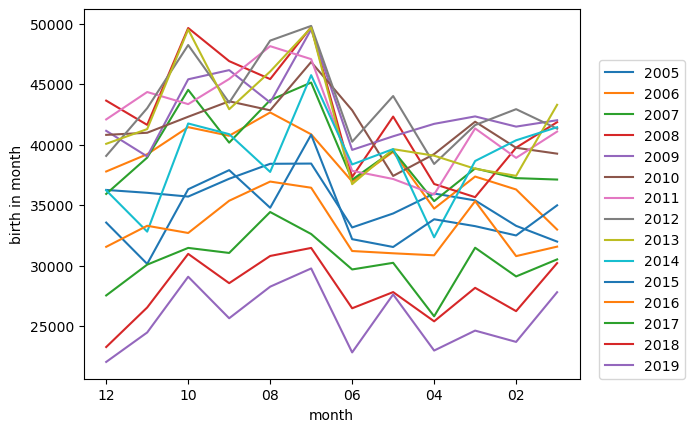

In [54]:
'''Plot for each year'''


import matplotlib.pyplot as plt
df2.set_index('month_short').groupby('year')['diff'].plot()
plt.legend(loc=(1.04, 0))
plt.xlabel('month')
plt.ylabel('birth in month')

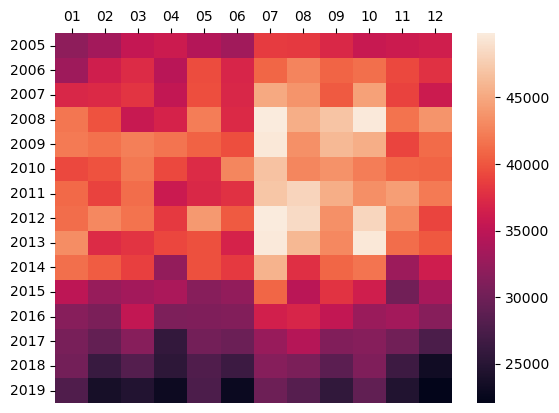

In [55]:
'''Plot for each year'''



import seaborn as sns
pivot_df=df2[['year','month_short', 'diff']].pivot(index="year", columns="month_short", values="diff")
ax = sns.heatmap(pivot_df)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

Text(0, 0.5, 'AVG birth')

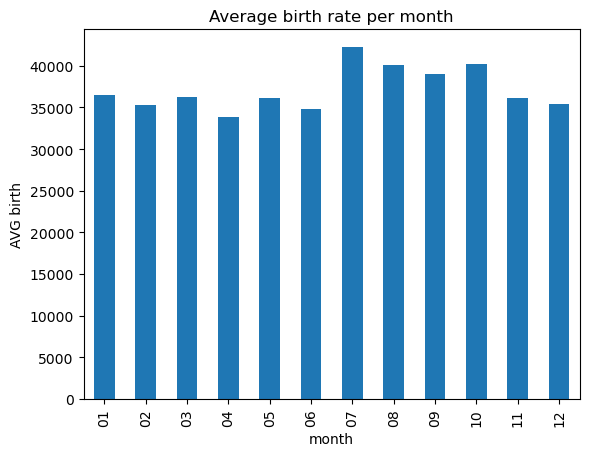

In [56]:
'''Plot average for all months'''

df_x=df2.copy()
df_x=df_x.set_index('month_short')
df_x=df_x.sort_index()
df_plot=df_x.groupby('month_short')['diff'].mean()
df_plot.plot.bar()
plt.title("Average birth rate per month")
plt.xlabel('month')
plt.ylabel('AVG birth')

In [57]:
'''Find the share of a month in each year '''

df3=df2.copy()
df3=df3[['year', 'month_short', 'diff']]
df_group=df3.groupby('year')['diff'].sum()
df3=df3.merge(df_group, how='left', on='year')
df3=df3.rename(columns={"diff_x": "diff", "diff_y": "total"})
df3['shere']=(df3['diff']/df3['total'])*100
df3


,year,month_short,diff,total,shere
0,2019,12,22040.0,308817.0,7.136913
1,2019,11,24474.0,308817.0,7.925082
2,2019,10,29081.0,308817.0,9.416904
3,2019,09,25649.0,308817.0,8.305566
4,2019,08,28259.0,308817.0,9.150727
...,...,...,...,...,...
175,2005,05,34309.0,426085.0,8.052149
176,2005,04,35959.0,426085.0,8.439396
177,2005,03,35389.0,426085.0,8.305620
178,2005,02,33287.0,426085.0,7.812291


In [59]:
'''Find the average share'''

df_coef_month=df3.groupby('month_short')['shere'].mean()
df_coef_month

month_short
01    8.215084
02    7.909194
03    8.144557
04    7.597632
05    8.128993
06    7.812092
07    9.460962
08    9.012697
09    8.742796
10    8.993096
11    8.088323
12    7.894573
Name: shere, dtype: float64

<Axes: xlabel='month_short'>

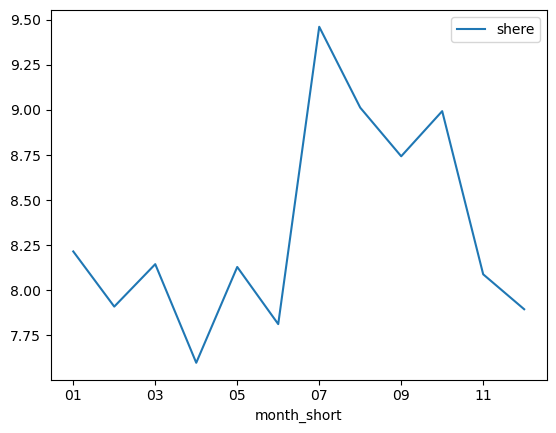

In [60]:
df_coef_month.plot(legend=True)

## Coefficients for periods


decided not to use it

In [61]:
'''Find the share of a season in each year''' 


df4=df2.copy()
df4=df4[['year', 'month_short', 'diff']]
def find_period(month_short):
    if month_short in ('12', '01', '02'):
        return '1 winter'
    elif month_short in ('03', '04', '05'):
        return '2 spring'
    elif month_short in ('06', '07', '08'):
        return '3 summer'
    elif month_short in ('09', '10', '11'):
        return '4 autumn'
    else: 
        return 'Error'
df4['period']=''
df4['period'] = df4['month_short'].apply(lambda x: find_period(x))

df4=df4.groupby(['year', 'period'])['diff'].sum().reset_index() # group by quarter

df_group=df3.groupby('year')['diff'].sum() # group for total

df4=df4.merge(df_group, how='left', on='year')
df4=df4.rename(columns={"diff_x": "diff", "diff_y": "total"})
df4['shere']=(df4['diff']/df4['total'])
df4


,year,period,diff,total,shere
0,2005,1 winter,101525.0,426085.0,0.238274
1,2005,2 spring,105657.0,426085.0,0.247972
2,2005,3 summer,110001.0,426085.0,0.258167
3,2005,4 autumn,108902.0,426085.0,0.255588
4,2006,1 winter,107049.0,460368.0,0.232529
5,2006,2 spring,111475.0,460368.0,0.242143
6,2006,3 summer,120463.0,460368.0,0.261667
7,2006,4 autumn,121381.0,460368.0,0.263661
8,2007,1 winter,110268.0,472657.0,0.233294
9,2007,2 spring,112870.0,472657.0,0.238799


     period     shere
0  1 winter  0.240189
1  2 spring  0.238712
2  3 summer  0.262858
3  4 autumn  0.258242


<BarContainer object of 4 artists>

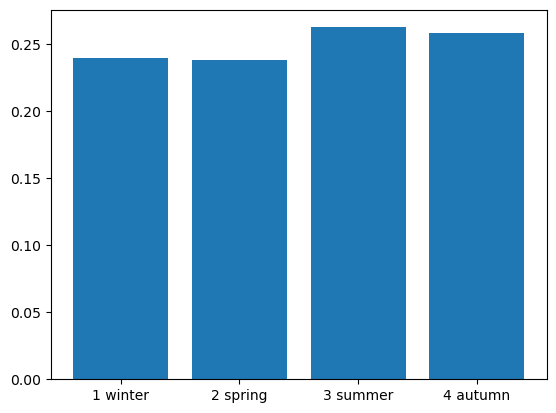

In [62]:

df_coef_period=df4.groupby('period')['shere'].mean().reset_index()
print(df_coef_period)

plt.bar(x = 'period', height = 'shere', data = df_coef_period)


### Save files

In [64]:
df_coef_month.to_csv('coefficient month.csv') #append
df_coef_period.to_csv('coefficient quarter.csv') #append
